In [25]:
# %pip install pandas
# %pip install requests
# %pip install nltk
#%pip install sklearn
%pip install lxml

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 4.4 MB 2.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
import nltk as nltk
import numpy as np
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')


/Users/lyapin.iv/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
#Useful links
#1) Data description here: https://api.hh.ru/openapi/redoc#tag/Vakansii/operation/get-vacancy


client_ID = 'G4HKQTVNL0FVIJODM6H50843J1K648KKQA3EDIJAK1NO89R3FB95NPDNR85U7FNK'
client_secret = 'PFTRBO58U01UTNVAQIVSCF5JGFTV1GI56J68P71L6O1CNL36FUIM1G416LAJBIEA'
token_url = 'https://api.hh.ru/token'
data={'grant_type': 'client_credentials',
      'client_id': client_ID,
      'client_secret': client_secret}

response = requests.post(token_url, data=data)
access_token = response.json()['access_token']
#access_token = 'APPLIPTT4SK3O2MVU8T8AMGEAQC7TV6L2OK285KGVE37E476N7AEMUIA4EDFJPR0'



In [59]:
response

<Response [200]>

In [19]:
print(access_token)

#%pip install pandas

APPLIPTT4SK3O2MVU8T8AMGEAQC7TV6L2OK285KGVE37E476N7AEMUIA4EDFJPR0


In [1]:
import requests
import json
import time
import os
import pandas as pd

/Users/lyapin.iv/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
def get_vacancies(city, vacancy, page):
    url = 'https://api.hh.ru/vacancies'
    params = {
        'text': f"{vacancy}",
        'area': city,
        'specialization': 1,
        'per_page': 100,
        'page': page
    }
    headers = {
        'Authorization': f'Bearer {access_token}'
    }

    response = requests.get(url, params=params, headers=headers)
    response.raise_for_status()
    return response.json()


def get_vacancy_description(vacancy_id):

    url = f'https://api.hh.ru/vacancies/{vacancy_id}'
    params = {'vacancy_id': vacancy_id}
    headers = {
        'HH-User-Agent': 'term_paper_app (internetgem@gmail.com)'
    }
    response = requests.get(url, params=params, headers=headers)
    response.raise_for_status()
    return pd.json_normalize(response.json())['description'][0]
get_vacancy_description(100620264)

'<div> <div> <p>Постройте вашу карьеру в Яндекс. Необходимо будет заполнить небольшую анкету, после чего с вами свяжутся для интервью.</p> <p><strong>Кого ищем?</strong></p> <p>Специалиста поддержки в сервисы Яндекс Go. Мы консультируем пользователей в чатах и по телефону, помогаем им по любым вопросам и решаем конфликтные ситуации. Делаем это и днем, и ночью (на выбор, конечно). Это удаленная работа на полный день за компьютером.</p> <p><strong>Что предстоит делать:</strong></p> <ul> <li>работать с клиентами или партнерами для решения разнообразных ситуаций;</li> <li>совершать звонки по их обращениям и давать письменные ответы;</li> <li>развивать процессы и инструменты для улучшения качества сервисов</li> </ul> <p><strong>Мы ищем человека, который:</strong></p> <ul> <li>способен работать в команде;</li> <li>способен принимать решения самостоятельно;</li> <li>готов учиться и узнавать новое.</li> </ul> <p><strong>Плюсами будут:</strong></p> <ul> <li>опыт работы в колл-центре или службе 

In [82]:
import time
vacancy_list = ['manager', 'analyst', 'аудитор', 'консультант','аналитик','BI', 'психолог', 'маркетолог', 'юрист', 'разработчик', 'менеджер' , 'тестировщик', 'инженер', 'дизайнер']
to_concat = list()
vacancy_list = ['data analyst', 'аналитик', 'data scientist']
vacancy_list = ['manager', 'менеджер' ]
for vacancy in vacancy_list:
    for city in [113]:
        for page in range(1,20):
                data = get_vacancies(city,vacancy, page)['items']
                df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')
                to_concat.append(df)

df_vacancy = pd.concat(to_concat)

df_vacancy.astype(str).drop_duplicates()
df_vacancy.dropna(subset = ['salary.from'],inplace=True)

# dict_vacancies = {'id': [], 'description': []}
# for vacancy in df_vacancy['id'].unique().tolist():
#     try:
#         dict_vacancies['description'].append(get_vacancy_description(vacancy))
#         dict_vacancies['id'].append(vacancy)
#     except:
#         time.sleep(61)
#         print('sleeping')

     
     
     


In [62]:

vacancy_descr = pd.DataFrame(dict_vacancies)
df_vacancy = pd.merge(df_vacancy, vacancy_descr, how = 'inner', left_on= 'id', right_on = 'id')


# from datetime import datetime

# str1 = '2022-04-27T01:15:20+00:00'
# datetime.fromisoformat(str1).time()

#df_vacancy['id']

In [63]:
#df_vacancy[['name', 'address.city', 'experience.name', 'salary.from', 'salary.to', 'salary.gross', 'schedule.name', 'type.name', 'description']]

df_vacancy['snippet.requirement'] = df_vacancy['description']

df_vacancy
# for_plot = df_vacancy.groupby(by = 'area.name').count().sort_values('salary.from', ascending= True)[['salary.from']]
# for_plot[for_plot['salary.from'] > 100].plot(kind = 'barh', legend= False, xlabel = 'Number of vacancies', ylabel = 'City')

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,brand_snippet.logo_xs,brand_snippet.logo_scalable,brand_snippet.picture,brand_snippet.picture_xs,brand_snippet.picture_scalable,brand_snippet.background.color,brand_snippet.background.gradient,immediate_redirect_url,immediate_redirect_vacancy_id,description
0,97978612,False,BI/Data-аналитик,NaN,False,False,NaN,None,None,2024-06-16T11:11:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p><strong>SKIFMUSIC</strong> сегодня - это жи...
1,102059937,False,Web - аналитик,NaN,False,False,NaN,None,None,2024-06-17T13:28:37+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p><strong>О компании</strong></p> <p>Брусника...
2,101735986,False,BI - аналитик,NaN,False,False,NaN,None,None,2024-06-17T13:08:53+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p>На данный момент мы ищем <strong>BI-аналити...
3,99737480,False,Урбан-аналитик данных,NaN,False,False,NaN,None,None,2024-06-17T17:13:09+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p><strong>Обязанности:</strong></p> <p>• Анал...
4,100098989,False,Бизнес аналитик (middle),NaN,False,False,NaN,None,None,2024-06-17T17:23:01+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p><em>Добрый день! Мы занимаемся продажей нов...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,99925786,False,Junior Data Scientist (NLP),NaN,False,False,NaN,None,None,2024-05-23T10:06:18+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p>Мы– это новый технологический продукт в сфе...
897,99925787,False,Junior Data Scientist (NLP),NaN,False,False,NaN,None,None,2024-05-23T10:06:18+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p>Мы– это новый технологический продукт в сфе...
898,99925788,False,Junior Data Scientist (NLP),NaN,False,False,NaN,None,None,2024-05-23T10:06:18+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p>Мы– это новый технологический продукт в сфе...
899,99925789,False,Junior Data Scientist (NLP),NaN,False,False,NaN,None,None,2024-05-23T10:06:18+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p>Мы– это новый технологический продукт в сфе...


In [39]:
df_vacancy[(df_vacancy['salary.from'] < 1000000) & (df_vacancy['salary.from'] > 5000) ].describe()[['salary.from', 'salary.to', 'is_cognitive', 'is_social', 'is_specific_computer',
       'is_general_computer', 'is_higher_ed']]


KeyError: "['is_cognitive', 'is_social', 'is_specific_computer', 'is_general_computer', 'is_higher_ed'] not in index"

In [83]:
def list_stemmer(lst:list):
    return [stemmer.stem(word) for word in lst]
#df_vacancy['tokenized_words'] =
df_vacancy['snippet.requirement'].dropna(inplace= True)
df_vacancy  = df_vacancy[~df_vacancy['snippet.requirement'].isnull()]
#nltk.word_tokenize(df_vacancy['snippet.requirement'], language= 'Russian')

#df_vacancy.apply(lambda row: nltk.word_tokenize(row['snippet.requirement']), axis=1)
#df_vacancy['snippet.requirement'].iloc[0]
#df_vacancy['snippet.requirement'].apply(nltk.word_tokenize, args = ('russian', False))
df_vacancy['words_tokenized']  = df_vacancy["snippet.requirement"].apply(nltk.word_tokenize)


stemmer = SnowballStemmer("russian")
df_vacancy['words_stemmed'] =  df_vacancy['words_tokenized'].apply(list_stemmer)




df_vacancy['experience_years'] = np.select(
    [
        df_vacancy['experience.name'] == 'От 1 года до 3 лет', 
        df_vacancy['experience.name'] == 'Нет опыта' ,
        df_vacancy['experience.name'] == 'От 3 до 6 лет',
        df_vacancy['experience.name'] == 'Более 6 лет'
    ], 
    [
        1.5, 
        0,
        4.5,
        6

    ], 
    default=np.nan
)




In [84]:
df_vacancy['area.name'].unique()


array(['Тихвин', 'Санкт-Петербург', 'Москва', 'Саратов', 'Краснодар',
       'Тверь', 'Самара', 'Ростов-на-Дону', 'Вологда', 'Пермь', 'Казань',
       'Нижний Новгород', 'Екатеринбург', 'Астрахань', 'Уфа', 'Челябинск',
       'Воронеж', 'Новосибирск', 'Мурманск', 'Сочи', 'Оренбург', 'Тула',
       'Кириллов', 'Набережные Челны', 'Омск', 'Калининград', 'Петушки',
       'Улан-Удэ', 'Курск', 'Кострома', 'Тюмень', 'Тамбов',
       'Киров (Кировская область)', 'Иркутск', 'Псков', 'Ярославль',
       'Бронницы', 'Брянск', 'Барнаул', 'Иваново (Ивановская область)',
       'Владивосток', 'Томск', 'Орел', 'Кемерово', 'Йошкар-Ола',
       'Ульяновск', 'Курган', 'Смоленск', 'Обнинск', 'Липецк',
       'Череповец', 'Электросталь', 'Чебоксары', 'Волгодонск', 'Истра',
       'Пенза', 'Гатчина', 'Новочеркасск',
       'Михайловка (Волгоградская область)', 'Домодедово', 'Рязань',
       'Подольск (Московская область)', 'Зеленоградск', 'Красногорск',
       'Симферополь', 'Ангарск', 'Нижневартовск', '

In [85]:
# df_vacancy['salary_from'] = df_vacancy['salary.from'].where(df_vacancy['salary.gross'] == False, df_vacancy['salary.from']*1.13)
# df_vacancy['salary_to'] = df_vacancy['salary.to'].where(df_vacancy['salary.gross'] == False, df_vacancy['salary.to']*1.13)


# df_vacancy['salary_from'] = np.select(
#     [
#         (df_vacancy['salary.gross'] == True), 
#         (df_vacancy['salary.gross'] == False)
#     ], 
#     [
#         (df_vacancy['salary.from']), 
#         (df_vacancy['salary.from']*1.13),
#     ], 
#     default=np.nan
# )

# df_vacancy['salary.to'] = np.select(
#     [
#         (df_vacancy['salary.gross'] == True), 
#         (df_vacancy['salary.gross'] == False)

        
#     ], 
#     [
#         (df_vacancy['salary.to']), 
#         (df_vacancy['salary.to']*1.13),
#     ], 
#     default=np.nan
# )

# df_vacancy['salary_from']


cognitive_keywords = ['анал','матем', 'статис', 'иссле', 'крити', 'логик']
social_keywords = ['общен','коммуни', 'презен', 'командн']
general_computer_kw = ['excel', 'word', 'powerpoint', 'компью', 'outlook']
specific_computer_kw = ['python','c#', 'c%+%+' ,'r', 'java', 'html', 'css', 'ml', 'sql', 'tableau', 'qlik', 'ruby', 'go', 'erp', 'linux', 'machine learning']


df_vacancy['is_cognitive'] = np.select(
    [   df_vacancy['snippet.requirement'].str.contains('|'.join(cognitive_keywords), na=False),
        ~ df_vacancy['snippet.requirement'].str.contains('|'.join(cognitive_keywords), na=False)
    ], 
    [   1, 
        0
    ], 
    default=np.nan
)

df_vacancy['is_social'] = np.select(
    [   df_vacancy['snippet.requirement'].str.contains('|'.join(social_keywords), na=False),
        ~ df_vacancy['snippet.requirement'].str.contains('|'.join(social_keywords), na=False)
    ], 
    [   1, 
        0
    ], 
    default=np.nan
)



df_vacancy['is_specific_computer'] = np.select(
    [   df_vacancy['snippet.requirement'].str.contains('|'.join(specific_computer_kw), na=False),
        ~ df_vacancy['snippet.requirement'].str.contains('|'.join(specific_computer_kw), na=False)
    ], 
    [   1, 
        0
    ], 
    default=np.nan
)

df_vacancy['is_general_computer'] = np.select(
    [   df_vacancy['snippet.requirement'].str.contains('|'.join(general_computer_kw), na=False),
        ~ df_vacancy['snippet.requirement'].str.contains('|'.join(general_computer_kw), na=False)
    ], 
    [   1, 
        0
    ], 
    default=np.nan
)

df_vacancy['is_higher_ed'] = np.select(
    [   df_vacancy['snippet.requirement'].str.contains('высш', na=False),
        ~ df_vacancy['snippet.requirement'].str.contains('высш', na=False)
    ], 
    [   1, 
        0
    ], 
    default=np.nan
)

#df_vacancy = df_vacancy[df_vacancy['salary_from'] <= 400000]



from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df_vacancy[['employment.id', 'schedule.name']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['employment.id', 'schedule.name']))
one_hot_df.rename(columns={'schedule.name_Гибкий график': 'schedule_flex',
                           'schedule.name_Полный день': 'schedule_full',
                           'schedule.name_Сменный график': 'schedule_shift',
                           'schedule.name_Удаленная работа': 'schedule_remote',
                           'employment.id_full' :  'employment_full',
                           'employment.id_probation' :  'employment_probation',
                           'employment.id_project' :  'employment_project',
                           'employment.id_part' :  'employment_part'

}, inplace= True)
one_hot_df

df_vacancy.reset_index(inplace=True, drop=True)

df_vacancy = pd.concat([df_vacancy, one_hot_df], axis = 1)

df_vacancy


,id,premium,name,department,has_test,response_letter_required,salary,response_url,sort_point_distance,published_at,...,is_general_computer,is_higher_ed,employment_full,employment_part,employment_probation,employment_project,schedule_flex,schedule_full,schedule_shift,schedule_remote
0,102100903,False,Менеджер,None,False,False,NaN,None,None,2024-06-17T13:36:50+0300,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
1,101936236,False,Project manager,None,False,False,NaN,None,None,2024-06-17T13:35:19+0300,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,102099244,False,Revenue Manager,None,False,False,NaN,None,None,2024-06-17T13:22:16+0300,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,102098829,False,Revenue Manager,None,False,False,NaN,None,None,2024-06-17T13:20:01+0300,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,99702308,False,Менеджер,None,False,False,NaN,None,None,2024-06-17T13:17:37+0300,...,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,100704732,False,Менеджер клининга,NaN,False,False,NaN,None,None,2024-06-17T12:15:50+0300,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2522,99814003,False,Менеджер по персоналу,NaN,False,False,NaN,None,None,2024-06-17T17:56:47+0300,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2523,101835263,False,Менеджер склада,NaN,False,False,NaN,None,None,2024-06-17T12:15:10+0300,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2524,101925966,False,Офис-менеджер,NaN,False,False,NaN,None,None,2024-06-17T12:07:33+0300,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [86]:
df_vacancy['is_higher_ed'] = np.select(
    [   df_vacancy['snippet.requirement'].str.contains('высш', na=False),
        ~ df_vacancy['snippet.requirement'].str.contains('высш', na=False)
    ], 
    [   1, 
        0
    ], 
    default=np.nan
)

df_vacancy['employer_trusted'] = np.select(
    [   df_vacancy['employer.trusted'] == True,
        df_vacancy['employer.trusted'] == False
    ], 
    [   1, 
        0
    ], 
    default=np.nan
)


In [87]:
#model = sm.ols(df_vacancy['salary_from'], df_vacancy['experience_years'])
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.iolib.summary2 import summary_col

for city in df_vacancy['area.name'].unique().tolist(): 
    scaler = MinMaxScaler()
    df_vacancy['salary_scaled'] = scaler.fit_transform(np.array(df_vacancy['salary.from']).reshape(-1,1))
    df_vacancy['logged_salary'] = np.log(df_vacancy['salary.from'])
    df_vacancy['salary_from'] = df_vacancy['salary.from']

    city_df = df_vacancy.copy()
    city_df = city_df[city_df['area.name'] == city]
    if city_df.shape[0] >= 100:
        pass
    else:
        continue
    model = smf.ols('salary_from ~ experience_years +  is_cognitive + is_social + is_specific_computer + is_general_computer + schedule_full + employer_trusted', data=city_df).fit()

    print(city)
    print(model.summary())

    summary = model.summary()
    pd.read_html(summary.tables[0].as_html(), index_col= 0)[0].to_excel(f'managers_description{city}.xlsx')
    pd.read_html(summary.tables[1].as_html(), index_col= 0)[0].to_excel(f'managers_coefs_{city}.xlsx')

#experience_years

Санкт-Петербург
                            OLS Regression Results                            
Dep. Variable:            salary_from   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     7.910
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           7.16e-09
Time:                        20:08:56   Log-Likelihood:                -3896.5
No. Observations:                 336   AIC:                             7809.
Df Residuals:                     328   BIC:                             7839.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept       

/var/folders/jr/v030kcjd1xlgvm50fjv_7f040000gp/T/ipykernel_4617/2985014652.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_html(summary.tables[0].as_html(), index_col= 0)[0].to_excel(f'managers_description{city}.xlsx')
/var/folders/jr/v030kcjd1xlgvm50fjv_7f040000gp/T/ipykernel_4617/2985014652.py:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_html(summary.tables[1].as_html(), index_col= 0)[0].to_excel(f'managers_coefs_{city}.xlsx')
/var/folders/jr/v030kcjd1xlgvm50fjv_7f040000gp/T/ipykernel_4617/2985014652.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_html(summary.tables[0].as_html

# What you see below are attempts at making a new model

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_vacancy['snippet.requirement'])
tfidf_matrix_array = tfidf_matrix.toarray()
feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_matrix.toarray()[581]


# most_frequent_words = df_vacancy['words_tokenized'].explode().value_counts()
# most_frequent_words[most_frequent_words < 55]

#flattened_words = [word for sublist in data['words_tokenized'] for word in sublist]

array([0., 0., 0., ..., 0., 0., 0.])

In [261]:
tfidf = TfidfVectorizer()
text_features = tfidf.fit_transform(df_vacancy['snippet.requirement']).toarray()

# Combine text features with salary data
text_df = pd.DataFrame(text_features, columns=tfidf.get_feature_names_out())
merged_df = pd.concat([text_df, df_vacancy['salary_from']], axis=1)

# Calculate correlation
correlation = merged_df.corr()['salary_from']

# Sort correlation values
correlation_sorted = correlation.sort_values(ascending=False)

correlation_sorted[correlation_sorted > 0.1]

In [175]:
#correlation_sorted[correlation_sorted > 0.1]
def extract_skills(description):
    cognitive_keywords = ['анал','матем', 'статис', 'иссле', 'крити']
    social_keywords = ['общен','коммуни', 'презен']
    general_computer_kw = ['excel', 'word', 'powerpoint', 'компью', 'outlook']
    specific_computer_kw = ['python','c#', 'c%+%+' ,'rstudio', 'java', 'html', 'css', 'ml', 'sql', 'tableau', 'qliksense', 'ruby', 'go', 'erp', 'machine learning', 'power bi']

    social = [skill for skill in social_keywords if skill in description.lower()]
    computer = [skill for skill in specific_computer_kw if skill in description.lower()]
    return ', '.join(social) if social else None, ', '.join(computer) if computer else None

df_vacancy[['social_skills', 'computer_skills']] = df_vacancy['snippet.requirement'].apply(lambda x: pd.Series(extract_skills(x)))

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
tfidf = TfidfVectorizer()

X_text = tfidf.fit_transform(df_vacancy['snippet.requirement']).toarray()
X = pd.DataFrame(X_text, columns=tfidf.get_feature_names_out())

# One-hot encode computer skills
encoder = OneHotEncoder()
X_computer_skills = encoder.fit_transform(df_vacancy['computer_skills'].str.split(', ', expand=True)).toarray()
X_social_skills = encoder.fit_transform(df_vacancy['computer_skills'].str.split(', ', expand=True)).toarray()

# Combine TF-IDF features with encoded computer skills
X = pd.concat([pd.DataFrame(X_text), pd.DataFrame(X_computer_skills), pd.DataFrame(X_social_skills)], axis=1)

# Target variable
y = df_vacancy['salary_from']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
# Target variable
y = df_vacancy['salary_from']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print('R squared', r2)

X_test

Mean Squared Error: 3.165694839830897e+29
Mean Squared Error: 3.165694839830897e+29
R squared -6.494505367351449e+19


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
tfidf = TfidfVectorizer()
X_tfidf= tfidf.fit_transform(df_vacancy['snippet.requirement'].str.lower())
cognitive_keywords = ['анал','матем', 'статис', 'иссле', 'крити']
social_keywords = ['общен','коммуни', 'презен']
general_computer_kw = ['excel', 'word', 'powerpoint', 'компью', 'outlook']

#Computer keywords
specific_computer_kw = ['python','c#', 'c%+%+' ,'rstudio', 'java', 'html', 'css', 'ml', 'sql', 'tableau', 'qliksense', 'ruby', 'go', 'erp', 'machine learning', 'power bi']
valid_computer_kw = [word for word in specific_computer_kw if word in tfidf.vocabulary_]
X_computer_skills = tfidf.fit_transform(df_vacancy['snippet.requirement'])[:, [tfidf.vocabulary_[word] for word in valid_computer_kw]].sum(axis=1)

#Social
valid_social_keywords= [word for word in social_keywords if word in tfidf.vocabulary_]
X_social_skills = tfidf.fit_transform(df_vacancy['snippet.requirement'])[:, [tfidf.vocabulary_[word] for word in valid_social_keywords]].sum(axis=1)

#General_computer_kw

valid_general_keywords= [word for word in general_computer_kw if word in tfidf.vocabulary_]
X_general_skills = tfidf.fit_transform(df_vacancy['snippet.requirement'])[:, [tfidf.vocabulary_[word] for word in valid_general_keywords]].sum(axis=1)


#Cognitive keywords

valid_cognitive_keywords= [word for word in cognitive_keywords if word in tfidf.vocabulary_]
X_cognitive_skills = tfidf.fit_transform(df_vacancy['snippet.requirement'])[:, [tfidf.vocabulary_[word] for word in valid_cognitive_keywords]].sum(axis=1)


import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming you have your target variable (e.g., salary) and other features
X = np.column_stack((np.array(X_social_skills),np.array(X_cognitive_skills), np.array(X_general_skills),np.array(X_computer_skills), df_vacancy['experience_years']))
model = LinearRegression()
model.fit(X, df_vacancy['salary_from'])


predictions = model.predict(X)

r_squared = r2_score(y, predictions)
n = X.shape[0]  # Number of observations
p = X.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(adjusted_r_squared)

0.2689441519963818


In [206]:
for i in df_vacancy.columns:
    print(i)
df_vacancy[df_vacancy['working_days']]

id
premium
name
department
has_test
response_letter_required
response_url
sort_point_distance
published_at
created_at
archived
apply_alternate_url
show_logo_in_search
insider_interview
url
alternate_url
relations
working_days
working_time_intervals
working_time_modes
accept_temporary
professional_roles
accept_incomplete_resumes
adv_response_url
is_adv_vacancy
adv_context
area.id
area.name
area.url
salary.from
salary.to
salary.currency
salary.gross
type.id
type.name
address.city
address.street
address.building
address.lat
address.lng
address.description
address.raw
address.metro.station_name
address.metro.line_name
address.metro.station_id
address.metro.line_id
address.metro.lat
address.metro.lng
address.metro_stations
address.id
employer.id
employer.name
employer.url
employer.alternate_url
employer.logo_urls.90
employer.logo_urls.original
employer.logo_urls.240
employer.vacancies_url
employer.accredited_it_employer
employer.trusted
snippet.requirement
snippet.responsibility
contacts.na

ValueError: ('Lengths must match to compare', (5523,), (0,))

In [30]:
def linear_regression_assumptions(features, label, feature_names=None):
    """
    Tests a linear regression on the model to see if assumptions are being met
    """
    from sklearn.linear_model import LinearRegression
    
    # Setting feature names to x1, x2, x3, etc. if they are not defined
    if feature_names is None:
        feature_names = ['X'+str(feature+1) for feature in range(features.shape[1])]
    
    print('Fitting linear regression')
    # Multi-threading if the dataset is a size where doing so is beneficial
    if features.shape[0] < 100000:
        model = LinearRegression(n_jobs=-1)
    else:
        model = LinearRegression()
        
    model.fit(features, label)
    
    # Returning linear regression R^2 and coefficients before performing diagnostics
    r2 = model.score(features, label)
    print()
    print('R^2:', r2, '\n')
    print('Coefficients')
    print('-------------------------------------')
    print('Intercept:', model.intercept_)
    
    for feature in range(len(model.coef_)):
        print('{0}: {1}'.format(feature_names[feature], model.coef_[feature]))

    print('\nPerforming linear regression assumption testing')
    
    # Creating predictions and calculating residuals for assumption tests
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    
    def linear_assumption():
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.lmplot(x='Predicted', y='Actual', data=df_results, fit_reg=False)
        
        # Plotting the diagonal line
        line_coords = np.arange(df_results.min().min(), df_results.max().max())
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term')
        
        
    def normal_errors_assumption(p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.
               
        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        print('\n=======================================================================================')
        print('Assumption 2: The error terms are normally distributed')
        print()
    
        print('Using the Anderson-Darling test for normal distribution')

        # Performing the test on the residuals
        p_value = normal_ad(df_results['Residuals'])[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')
    
        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(df_results['Residuals'])
        plt.show()
    
        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
        else:
            print('Assumption not satisfied')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
        
        
    def multicollinearity_assumption():
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                           This assumption being violated causes issues with interpretability of the 
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        print('\n=======================================================================================')
        print('Assumption 3: Little to no multicollinearity among predictors')
        
        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
        plt.title('Correlation of Variables')
        plt.show()
        
        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')
       
        # Gathering the VIF for each variable
        VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
        for idx, vif in enumerate(VIF):
            print('{0}: {1}'.format(feature_names[idx], vif))
        
        # Gathering and printing total cases of possible or definite multicollinearity
        possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
        definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
        print()
        print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
        print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
        print()

        if definite_multicollinearity == 0:
            if possible_multicollinearity == 0:
                print('Assumption satisfied')
            else:
                print('Assumption possibly satisfied')
                print()
                print('Coefficient interpretability may be problematic')
                print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        
        
    def autocorrelation_assumption():
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson
        print('\n=======================================================================================')
        print('Assumption 4: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(df_results['Residuals'])
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')

            
    def homoscedasticity_assumption():
        """
        Homoscedasticity: Assumes that the errors exhibit constant variance
        """
        print('\n=======================================================================================')
        print('Assumption 5: Homoscedasticity of Error Terms')
        print('Residuals should have relative constant variance')
        
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
        plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show() 
        print('If heteroscedasticity is apparent, confidence intervals and predictions will be affected')
        
        
    linear_assumption()
    normal_errors_assumption()
    multicollinearity_assumption()
    autocorrelation_assumption()
    homoscedasticity_assumption()


Fitting linear regression

R^2: 0.24518940657847832 

Coefficients
-------------------------------------
Intercept: 99183.00274756447
experience_years: 18859.97107227088
is_cognitive: -8642.599171601585
is_social: -3059.01548548915
is_specific_computer: -10986.857194948829
is_general_computer: -57472.95935597077
schedule_full: -5890.164463298271

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


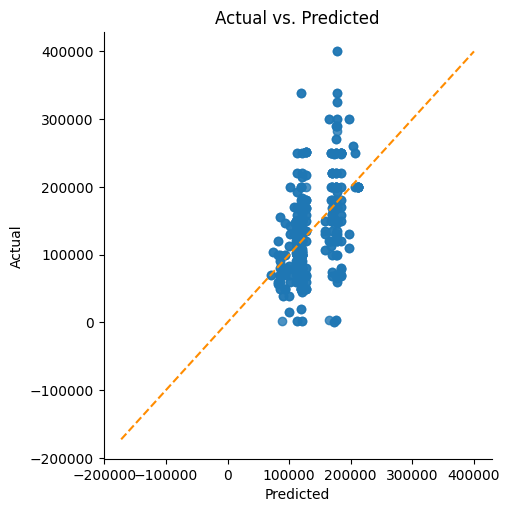

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 4.148520105059596e-08
Residuals are not normally distributed


/var/folders/jr/v030kcjd1xlgvm50fjv_7f040000gp/T/ipykernel_92002/1563325269.py:89: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


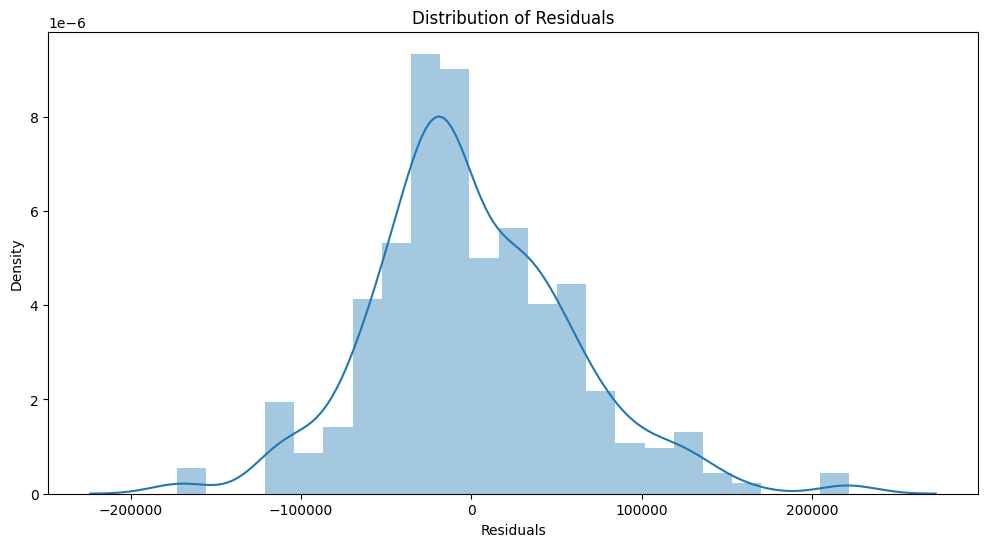


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 3: Little to no multicollinearity among predictors


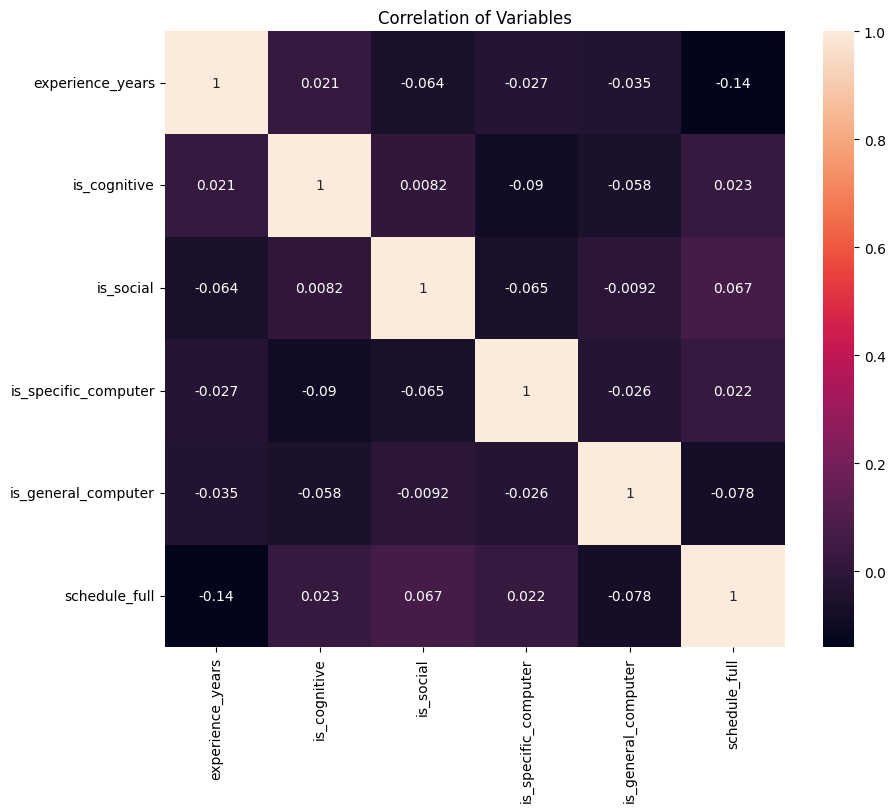

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
experience_years: 1.8281293114571278
is_cognitive: 1.6587495859606651
is_social: 1.0298326399575608
is_specific_computer: 1.1477641712475701
is_general_computer: 1.001668762493343
schedule_full: 1.8066051239391785

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.863538295798849
Little to no autocorrelation 

Assumption satisfied

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant variance


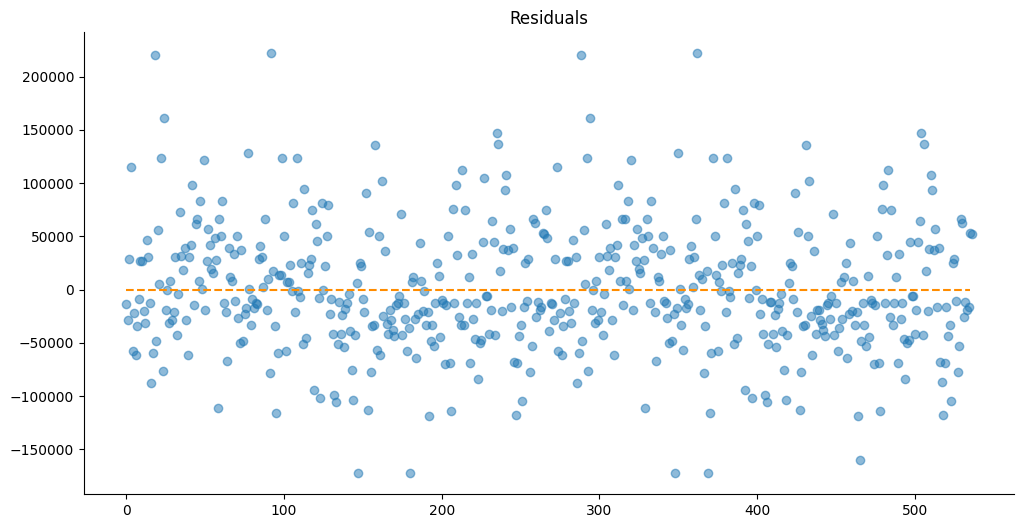

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

linear_regression_assumptions(df_vacancy[['experience_years', 'is_cognitive', 'is_social', 'is_specific_computer',  'is_general_computer', 'schedule_full']], df_vacancy['salary_from'], feature_names=['experience_years', 'is_cognitive', 'is_social', 'is_specific_computer',  'is_general_computer', 'schedule_full'])





In [76]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()

rfr.fit(df_vacancy[['experience_years', 'is_cognitive', 'is_social', 'is_specific_computer',  'is_general_computer', 'schedule_full']], df_vacancy['salary_from'])

df_rf_city = df_vacancy[df_vacancy['area.name']=='Санкт-Петербург']
print(mean_squared_log_error(df_rf_city['salary_from'], rfr.predict(df_rf_city[['experience_years', 'is_cognitive', 'is_social', 'is_specific_computer',  'is_general_computer', 'schedule_full']])))
print(r2_score(df_rf_city['salary_from'],rfr.predict(df_rf_city[['experience_years', 'is_cognitive', 'is_social', 'is_specific_computer',  'is_general_computer', 'schedule_full']])))

feat_importances = pd.Series(rfr.feature_importances_, index=['experience_years', 'is_cognitive', 'is_social', 'is_specific_computer',  'is_general_computer', 'schedule_full'])
feat_importances

0.7785844649675973
0.38932727864024275


experience_years       0.74
is_cognitive           0.08
is_social              0.06
is_specific_computer   0.01
is_general_computer    0.05
schedule_full          0.07
dtype: float64

In [106]:
from nltk.corpus import stopwords

russian_stopwords = stopwords.words('russian')
word_list = []
for i in range(df_vacancy.shape[0]):
    word_list = word_list + df_vacancy['words_tokenized'].iloc[i]
word_list = [word for word in word_list if word not in russian_stopwords]
    
pd.DataFrame({'words':word_list, 'n': 1}).groupby(by = ['words'], as_index= False).sum().sort_values(by = 'n', ascending= False).head(100)

,words,n
15,.,1525
67,>,1032
65,<,1032
7,",",917
243,highlighttext,516
...,...,...
1760,склад,18
1745,систем,18
1746,системами,18
2109,язык,18


In [73]:
df_vacancy['employer.trusted']

0      True
1      True
2      True
3      True
4      True
       ... 
532    True
533    True
534    True
535    True
536    True
Name: employer.trusted, Length: 537, dtype: bool

### Below one may find graphs for the presentation/paper

[Text(0.5, 1.0, 'Destribution of salary for analysts in Moscow and Saint-Petersburg'),
 Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Salary')]

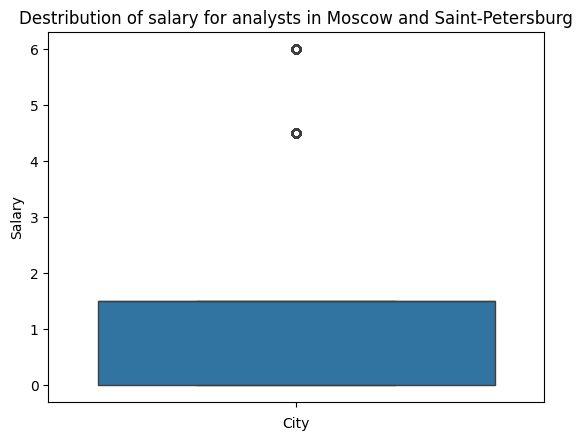

In [258]:
import seaborn as sns

sns.boxplot(data=df_vacancy, y="experience_years").set(title='Destribution of salary for analysts in Moscow and Saint-Petersburg'
                                                                                     ,xlabel='City', ylabel='Salary')

In [6]:
df_vacancy['']
# print(df_vacancy[df_vacancy['id'] == '101383870']['computer_skills'].iloc[0])

0                                      NaN
1                                      NaN
5                                      NaN
6                                      NaN
7                                      NaN
                      ...                 
88    Компания «Мария». Вакансии в студиях
89                                     NaN
91                                     NaN
92                                     NaN
98             Мебельная компания «Шатура»
Name: department.name, Length: 16669, dtype: object